<a href="https://colab.research.google.com/github/tomeelow/ames-housing-price-predictor/blob/main/housing_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [9]:
# Example: Ames Housing dataset
!kaggle datasets download -d shashanknecrothapa/ames-housing-dataset -p data

# Unzip
!unzip -o data/ames-housing-dataset.zip -d data


Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 541MB/s]
Archive:  data/ames-housing-dataset.zip
  inflating: data/AmesHousing.csv    


In [10]:
import pandas as pd

# Load the Ames Housing dataset into a DataFrame
df_ames = pd.read_csv('data/AmesHousing.csv')

# Display the first 5 rows of the DataFrame
display(df_ames.head())

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [12]:
df_ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
print(df_ames.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


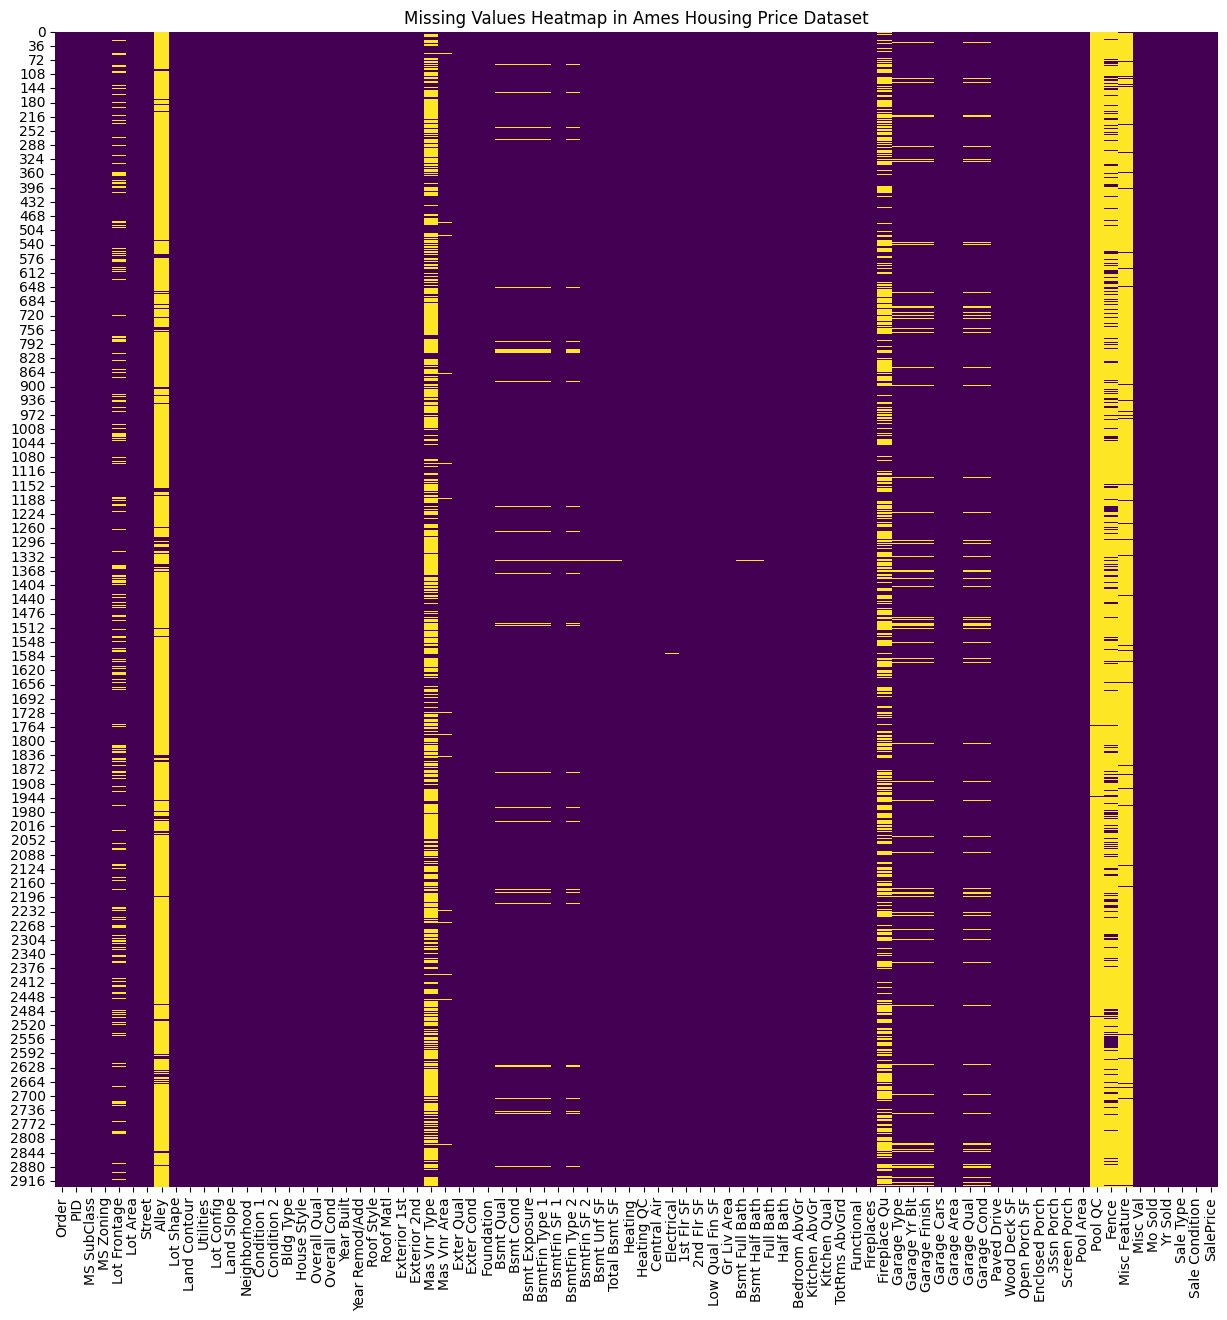

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(df_ames.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in Ames Housing Price Dataset')
plt.show()

In [15]:
# Proposed Data Cleaning Steps:

# 1. Drop columns with excessive missing values (e.g., >80% missing)
# Calculate percentage of missing values
missing_percent = df_ames.isnull().sum() / len(df_ames) * 100

# Identify columns to drop
drop_columns = missing_percent[missing_percent > 80].index
print(f"Columns to drop due to high missing values: {list(drop_columns)}")
df_ames_cleaned = df_ames.drop(columns=drop_columns)

# 2. Impute missing values for categorical columns (where 'NaN' likely means 'None')
# Example for Basement and Garage related categorical features
for col in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
            'Mas Vnr Type']:
    if col in df_ames_cleaned.columns:
        df_ames_cleaned[col] = df_ames_cleaned[col].fillna('None')

# 3. Impute missing values for numerical columns
# For Lot Frontage, impute with median within its neighborhood or overall median
if 'Lot Frontage' in df_ames_cleaned.columns:
    df_ames_cleaned['Lot Frontage'] = df_ames_cleaned['Lot Frontage'].fillna(df_ames_cleaned['Lot Frontage'].median())

# For Mas Vnr Area, impute with 0 (if 'None' for Mas Vnr Type) or median
if 'Mas Vnr Area' in df_ames_cleaned.columns:
    df_ames_cleaned['Mas Vnr Area'] = df_ames_cleaned['Mas Vnr Area'].fillna(0) # Assuming 0 for 'None'

# For Basement and Garage numerical features, impute with 0 (if 'None' for related categorical)
for col in ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
            'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']:
    if col in df_ames_cleaned.columns:
        df_ames_cleaned[col] = df_ames_cleaned[col].fillna(0)

# For Electrical, impute with the mode (most frequent value)
if 'Electrical' in df_ames_cleaned.columns:
    df_ames_cleaned['Electrical'] = df_ames_cleaned['Electrical'].fillna(df_ames_cleaned['Electrical'].mode()[0])

# For Garage Yr Blt, impute with Year Built or median
# A more sophisticated approach would be to impute based on 'Year Built' if Garage Type is 'None'
# For simplicity here, we'll use the median of existing garage years.
if 'Garage Yr Blt' in df_ames_cleaned.columns:
    df_ames_cleaned['Garage Yr Blt'] = df_ames_cleaned['Garage Yr Blt'].fillna(df_ames_cleaned['Garage Yr Blt'].median())

# Display remaining missing values to verify
print("\nMissing values after initial cleaning:")
print(df_ames_cleaned.isnull().sum()[df_ames_cleaned.isnull().sum() > 0])

display(df_ames_cleaned.head())

Columns to drop due to high missing values: ['Alley', 'Pool QC', 'Fence', 'Misc Feature']

Missing values after initial cleaning:
Series([], dtype: int64)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


*   **Order**: A unique ID for each record.
*   **PID**: Parcel identification number.
*   **MS SubClass**: Type of dwelling involved in the sale.
*   **MS Zoning**: General zoning classification.
*   **Lot Frontage**: Linear feet of street connected to property.
*   **Lot Area**: Lot size in square feet.
*   **Street**: Type of road access to property.
*   **Lot Shape**: General shape of property.
*   **Land Contour**: Flatness of the property.
*   **Utilities**: Type of utilities available.
*   **Lot Config**: Lot configuration.
*   **Land Slope**: Slope of property.
*   **Neighborhood**: Physical locations within Ames city limits.
*   **Condition 1**: Proximity to main road or railroad.
*   **Condition 2**: Proximity to main road or railroad (if a second is present).
*   **Bldg Type**: Type of dwelling.
*   **House Style**: Style of dwelling.
*   **Overall Qual**: Overall material and finish quality.
*   **Overall Cond**: Overall condition rating.
*   **Year Built**: Original construction date.
*   **Year Remod/Add**: Remodel date (same as construction date if no remodel or additions).
*   **Roof Style**: Type of roof.
*   **Roof Matl**: Roof material.
*   **Exterior 1st**: Exterior covering on house.
*   **Exterior 2nd**: Exterior covering on house (if more than one material).
*   **Mas Vnr Type**: Masonry veneer type.
*   **Mas Vnr Area**: Masonry veneer area in square feet.
*   **Exter Qual**: Exterior quality.
*   **Exter Cond**: Exterior condition.
*   **Foundation**: Type of foundation.
*   **Bsmt Qual**: Height of the basement.
*   **Bsmt Cond**: General condition of the basement.
*   **Bsmt Exposure**: Walkout or garden level basement walls.
*   **BsmtFin Type 1**: Quality of basement finished area 1.
*   **BsmtFin SF 1**: Type 1 finished square feet.
*   **BsmtFin Type 2**: Quality of basement finished area 2 (if present).
*   **BsmtFin SF 2**: Type 2 finished square feet.
*   **Bsmt Unf SF**: Unfinished square feet of basement area.
*   **Total Bsmt SF**: Total square feet of basement area.
*   **Heating**: Type of heating.
*   **Heating QC**: Heating quality and condition.
*   **Central Air**: Central air conditioning.
*   **Electrical**: Electrical system.
*   **1st Flr SF**: First Floor square feet.
*   **2nd Flr SF**: Second floor square feet.
*   **Low Qual Fin SF**: Low quality finished square feet (all floors).
*   **Gr Liv Area**: Above grade (ground) living area square feet.
*   **Bsmt Full Bath**: Basement full bathrooms.
*   **Bsmt Half Bath**: Basement half bathrooms.
*   **Full Bath**: Full bathrooms above grade.
*   **Half Bath**: Half baths above grade.
*   **Bedroom AbvGr**: Number of bedrooms above grade (does not include basement bedrooms).
*   **Kitchen AbvGr**: Number of kitchens above grade.
*   **Kitchen Qual**: Kitchen quality.
*   **TotRms AbvGrd**: Total rooms above grade (does not include bathrooms).
*   **Functional**: Home functionality rating.
*   **Fireplaces**: Number of fireplaces.
*   **Fireplace Qu**: Fireplace quality.
*   **Garage Type**: Garage location.
*   **Garage Yr Blt**: Year garage was built.
*   **Garage Finish**: Interior finish of the garage.
*   **Garage Cars**: Size of garage in car capacity.
*   **Garage Area**: Size of garage in square feet.
*   **Garage Qual**: Garage quality.
*   **Garage Cond**: Garage condition.
*   **Paved Drive**: Paved driveway.
*   **Wood Deck SF**: Wood deck area in square feet.
*   **Open Porch SF**: Open porch area in square feet.
*   **Enclosed Porch**: Enclosed porch area in square feet.
*   **3Ssn Porch**: Three season porch area in square feet.
*   **Screen Porch**: Screen porch area in square feet.
*   **Pool Area**: Pool area in square feet.
*   **Misc Val**: Value of miscellaneous feature.
*   **Mo Sold**: Month Sold (MM).
*   **Yr Sold**: Year Sold (YYYY).
*   **Sale Type**: Type of sale.
*   **Sale Condition**: Condition of sale.
*   **SalePrice**: Sale price ($).

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Added import for pandas

# Define the target variable
target = 'SalePrice'

# Define the proposed numerical features, removing 'Garage Area' due to high multicollinearity with 'Garage Cars'
numerical_features = [
    'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Garage Cars',
    'Year Built', 'Year Remod/Add', 'Full Bath',
    'TotRms AbvGrd', 'Lot Area', 'Mas Vnr Area', 'Fireplaces'
]

# Define the proposed categorical features
categorical_features = [
    'Neighborhood', 'House Style', 'Exter Qual', 'Kitchen Qual',
    'Bsmt Qual', 'Fireplace Qu', 'Garage Type', 'MS Zoning'
]

# Combine all selected features and the target
selected_features = numerical_features + categorical_features + [target]

# Create a new DataFrame with only the selected features
df_selected = df_ames_cleaned[selected_features].copy()

# Display the first few rows of the new DataFrame
print("DataFrame with selected features:")
display(df_selected.head())

DataFrame with selected features:


,Gr Liv Area,Overall Qual,Total Bsmt SF,Garage Cars,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Lot Area,Mas Vnr Area,Fireplaces,Neighborhood,House Style,Exter Qual,Kitchen Qual,Bsmt Qual,Fireplace Qu,Garage Type,MS Zoning,SalePrice
0,1656,6,1080.0,2.0,1960,1960,1,7,31770,112.0,2,NAmes,1Story,TA,TA,TA,Gd,Attchd,RL,215000
1,896,5,882.0,1.0,1961,1961,1,5,11622,0.0,0,NAmes,1Story,TA,TA,TA,None,Attchd,RH,105000
2,1329,6,1329.0,1.0,1958,1958,1,6,14267,108.0,0,NAmes,1Story,TA,Gd,TA,None,Attchd,RL,172000
3,2110,7,2110.0,2.0,1968,1968,2,8,11160,0.0,2,NAmes,1Story,Gd,Ex,TA,TA,Attchd,RL,244000
4,1629,5,928.0,2.0,1997,1998,2,6,13830,0.0,1,Gilbert,2Story,TA,TA,Gd,TA,Attchd,RL,189900


Now, we will create dummy variables for the categorical features to enable their inclusion in the correlation matrix calculation. This is a common step to represent categorical data numerically for such analysis.


Correlation with SalePrice (Top/Bottom 10):

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647562
Total Bsmt SF     0.632529
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Name: SalePrice, dtype: float64


Neighborhood_IDOTRR    -0.174641
Neighborhood_NAmes     -0.188632
Neighborhood_OldTown   -0.211944
Garage Type_None       -0.225950
MS Zoning_RM           -0.292590
Garage Type_Detchd     -0.365074
Bsmt Qual_TA           -0.452487
Fireplace Qu_None      -0.481446
Kitchen Qual_TA        -0.526721
Exter Qual_TA          -0.590897
Name: SalePrice, dtype: float64


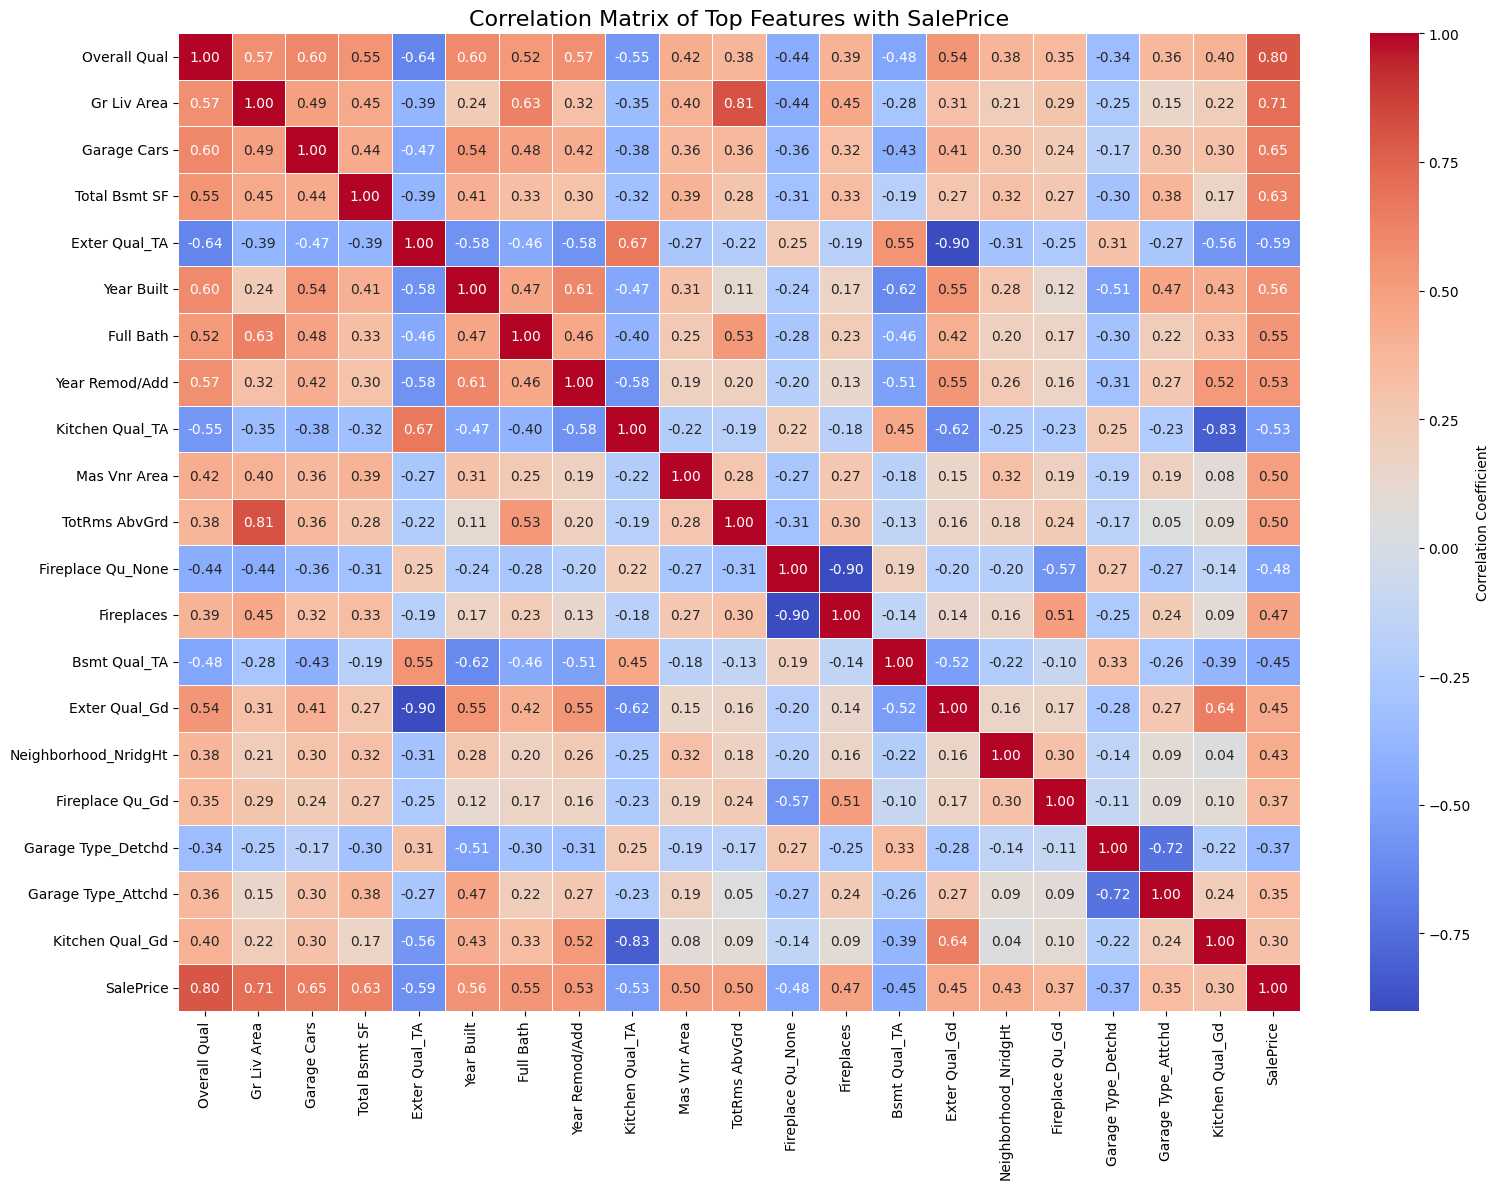

In [19]:
# One-hot encode categorical features for correlation calculation
df_encoded = pd.get_dummies(df_selected, columns=categorical_features, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix for 'SalePrice' to see feature importance
sale_price_corr = correlation_matrix[target].sort_values(ascending=False)
print("\nCorrelation with SalePrice (Top/Bottom 10):\n")
print(sale_price_corr.head(10))
print("\n")
print(sale_price_corr.tail(10))

# Visualize the correlation matrix of the top N features (e.g., top 20 most correlated with SalePrice)
# We'll include 'SalePrice' itself in the visualization

# Get top absolute correlations with SalePrice, excluding SalePrice itself
top_correlated_features = sale_price_corr.drop(target).abs().nlargest(20).index

# Include SalePrice in the list for plotting
features_for_heatmap = top_correlated_features.tolist() + [target]

# Filter the correlation matrix to these features
filtered_corr_matrix = df_encoded[features_for_heatmap].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(filtered_corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Top Features with SalePrice',
          fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Interpreting the Correlation Matrix for Feature Refinement

This correlation heatmap helps us understand relationships between features and `SalePrice`, as well as relationships among the features themselves:

*   **Strong positive correlations (close to 1)**: Features that increase in value when `SalePrice` increases. For example, `Gr Liv Area` and `Overall Qual` are usually highly correlated with `SalePrice`.
*   **Strong negative correlations (close to -1)**: Features that decrease in value when `SalePrice` increases. This is less common for housing features but could indicate an inverse relationship.
*   **Weak correlations (close to 0)**: Features that have little linear relationship with `SalePrice`.

**For further refinement:**

1.  **High Correlation with `SalePrice`**: Prioritize features with a high absolute correlation value with `SalePrice`. These are usually strong predictors.
2.  **Multicollinearity**: Look for features that are highly correlated with *each other* (e.g., two features having a correlation coefficient greater than 0.7 or 0.8). For instance, if `Garage Cars` and `Garage Area` are highly correlated, you might choose to keep only one to avoid multicollinearity, which can affect model interpretability and stability. Often, you'd keep the one that has a stronger correlation with `SalePrice`.
3.  **Feature Engineering Opportunities**: Sometimes, two moderately correlated features can be combined or transformed into a new, more predictive feature.

Based on this analysis, you can make informed decisions about which features to keep for your final model training.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
X    , y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (2344, 74)
Test features shape: (586, 74)
Training target shape: (2344,)
Test target shape: (586,)


In [21]:
# Identify numerical features for scaling (excluding one-hot encoded columns)
# We'll use the original numerical_features list, which are still present in df_encoded before one-hot encoding
numerical_cols_to_scale = [col for col in numerical_features if col in X_train.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features in both training and test sets
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Numerical features scaled successfully.")
display(X_train.head())

Numerical features scaled successfully.


,Gr Liv Area,Overall Qual,Total Bsmt SF,Garage Cars,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Lot Area,Mas Vnr Area,...,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
381,-0.243522,0.673941,0.099389,0.339813,0.181084,-0.381277,0.80217,-0.261706,0.033810,0.531409,...,False,False,False,False,False,False,False,False,True,False
834,1.254956,-0.766750,-0.076847,0.339813,-0.115603,-0.814347,0.80217,0.377959,2.307082,-0.569155,...,False,False,False,False,False,False,False,False,True,False
1898,-0.532910,-1.487095,-2.395369,0.339813,-0.280430,-1.054941,0.80217,-0.261706,-0.035514,-0.569155,...,False,True,False,False,False,False,False,False,True,False
678,-0.897619,-1.487095,-2.395369,0.339813,-0.708978,-1.632368,0.80217,-0.261706,-0.363746,-0.569155,...,False,False,True,False,False,False,False,False,True,False
700,0.412558,-1.487095,-1.022108,-2.337571,-1.664971,-1.632368,0.80217,1.017625,-0.310697,-0.569155,...,False,False,False,True,False,False,False,False,False,True


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.



Model Evaluation on Test Set:
Mean Absolute Error (MAE): 19275.60
Mean Squared Error (MSE): 1025334253.94
Root Mean Squared Error (RMSE): 32020.84
R-squared (R2): 0.87


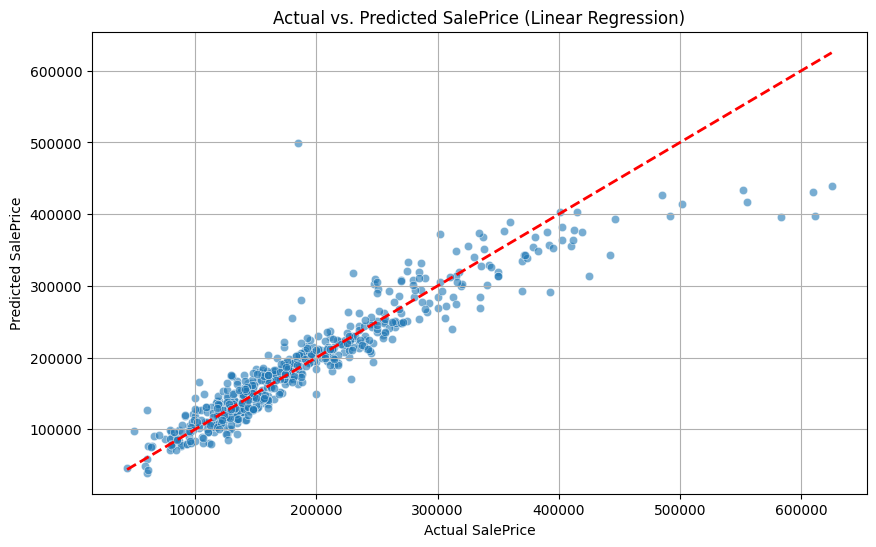

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, visualize predictions vs. actuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # y=x line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Linear Regression)")
plt.grid(True)
plt.show()

In [24]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
# Using some default parameters for a quick start, these can be tuned further
xg_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Objective function for regression tasks
    n_estimators=100,             # Number of boosting rounds
    learning_rate=0.1,            # Step size shrinkage to prevent overfitting
    max_depth=5,                  # Maximum depth of a tree
    random_state=42
)

# Train the XGBoost model on the training data
xg_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

# Make predictions on the test set with XGBoost
y_pred_xg = xg_model.predict(X_test)

# Evaluate the XGBoost model
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"\nModel Evaluation for XGBoost on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_xg:.2f}")
print(f"Mean Squared Error (MSE): {mse_xg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xg:.2f}")
print(f"R-squared (R2): {r2_xg:.2f}")

XGBoost Regressor model trained successfully.

Model Evaluation for XGBoost on Test Set:
Mean Absolute Error (MAE): 15981.34
Mean Squared Error (MSE): 676794112.00
Root Mean Squared Error (RMSE): 26015.27
R-squared (R2): 0.92


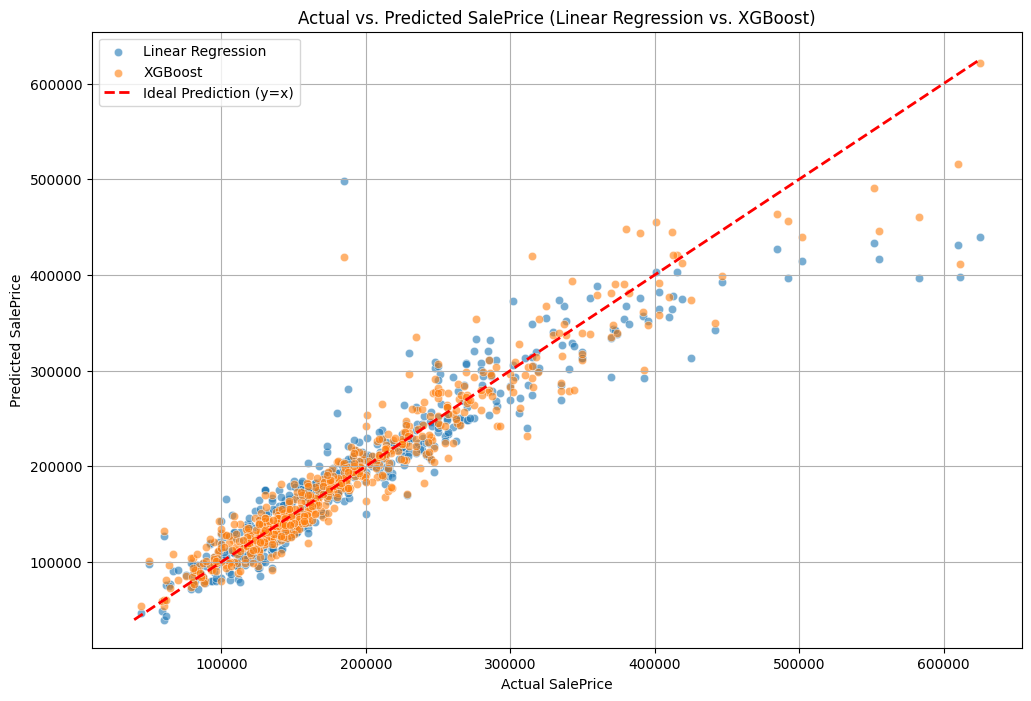

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions with Linear Regression (y_pred from previous cell)
# y_pred = model.predict(X_test) # Already computed in the previous step

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred, 'XGBoost': y_pred_xg})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Actual', y='Linear Regression', data=plot_df, alpha=0.6, label='Linear Regression')
sns.scatterplot(x='Actual', y='XGBoost', data=plot_df, alpha=0.6, label='XGBoost')

# Plot the ideal y=x line
min_val = min(y_test.min(), y_pred.min(), y_pred_xg.min())
max_val = max(y_test.max(), y_pred.max(), y_pred_xg.max())
plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Ideal Prediction (y=x)')

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Linear Regression vs. XGBoost)")
plt.legend()
plt.grid(True)
plt.show()